# Modeling
Author Brian Tam, 10/16/2020

Inserted my final processed train/test Dataframes 
into various models to evaluate

### Imports

In [2]:
# Get pandas and postgres to work together
import psycopg2 as pg
import pandas as pd
import numpy as np
import pickle

# Import spacy to do NLP
import spacy

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Import sklearn to do CountVectorizing
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

import matplotlib.pyplot as plt

import databricks.koalas as ks

# Topic Modeling
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

# Text Preprocessing
import re
import string

In [3]:
X_train_topics=pd.read_csv('X_train_topics.csv',index_col=0)
X_test_topics=pd.read_csv('X_test_topics.csv',index_col=0)
y_train_all=pd.read_csv('y_train.csv',index_col=0)
y_test_all=pd.read_csv('y_test.csv',index_col=0)

In [4]:
y_train_all.columns

Index(['type', 'I-E', 'N-S', 'T-F', 'J-P'], dtype='object')

In [5]:
target = 'N-S'

y_train = y_train_all[target]
y_test = y_test_all[target]

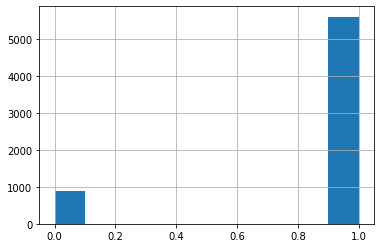

In [6]:
y_train.hist()

### Try classifying using Logistic Regression

In [7]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')

In [8]:
# Train the first model
lr.fit(X_train_topics, y_train)
y_pred_topics = lr.predict(X_test_topics)

In [9]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

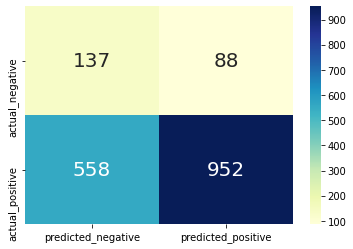

In [10]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_topics)

In [11]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1']
results

,LogReg1
Accuracy,0.628
Precision,0.915
Recall,0.630
F1 Score,0.746


### Try classifying using Naive Bayes

In [12]:
print(y_train.shape)
X_train_topics.shape

(6505,)


(6505, 40)

In [13]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_topics, y_train)

y_pred_topics_nb = mnb.predict(X_test_topics)

In [14]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_topics, y_train)

y_pred_nb = bnb.predict(X_test_topics)

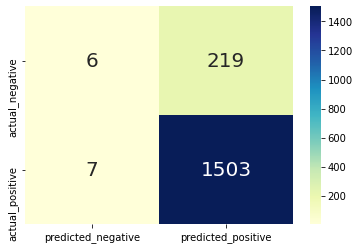

In [15]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_nb)

In [138]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm1, cm3)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['LogReg1', 'NB1']
results_nb

,LogReg1,NB1
Accuracy,0.628,0.870
Precision,0.915,0.873
Recall,0.630,0.995
F1 Score,0.746,0.930
